<a href="https://colab.research.google.com/github/KhafidhotulUrfa/MSIB_Dasar-Python/blob/main/Tugas%202%20Dasar%20Python%20Visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Khafidhotul Urfa
- Group: 1
- Lagu Favorit: Khanti

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# please import as much as you need

In [2]:
# import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [3]:
df_telco_cust=pd.read_csv('/content/drive/MyDrive/PDA_DataSource/Data Visualization/telco_customer.csv')
df_telco_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Monthly Charges by Paymen Method')

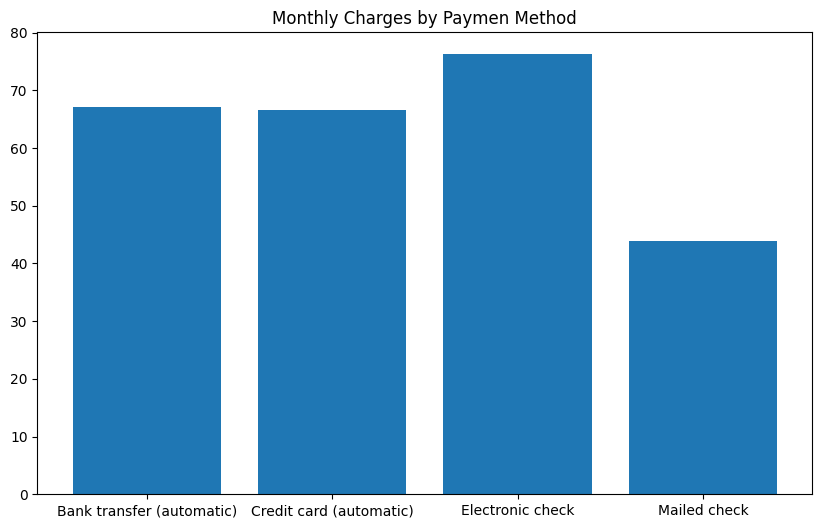

In [4]:
# your code goes here!
df_telco_grup=df_telco_cust.groupby(['PaymentMethod']).agg({'MonthlyCharges':'mean'}).reset_index()
plt.figure(figsize=(10,6))
plt.bar(df_telco_grup['PaymentMethod'],df_telco_grup['MonthlyCharges'])
plt.title('Monthly Charges by Paymen Method')


Jadi, dari plot di atas, dapat disimpulkan bahwa PaymentMethod yang memeiliki MonthlyCharges terbesar adalah Electronic chek



$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 40 hari

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

<Axes: ylabel='tenure grup'>

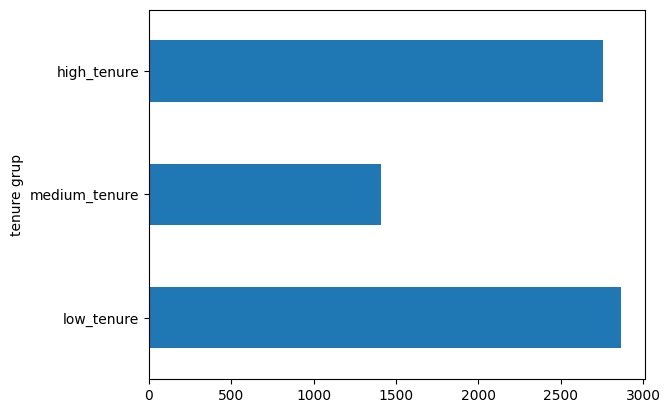

In [5]:
# your code goes here!
df2_telco= pd.DataFrame(df_telco_cust)
bins = [0,20,40,float('inf')]
kategori =['low_tenure','medium_tenure','high_tenure']
df2_telco['tenure grup']=pd.cut(df2_telco['tenure'],bins,labels=kategori,include_lowest=False)
df2_telco

df2_telco_grup = df2_telco.groupby('tenure grup')['customerID'].nunique()
df2_telco_grup.plot(x='tenure grup)', y='customerID', kind ='barh')
 # example only

Jadi, dari plot di atas, kami menyimpulkan bahwa tenure grup yang memiliki jumlah customer yang paling banyak adalah low tenure, dan yang paling sedikit adalah medium tenure

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



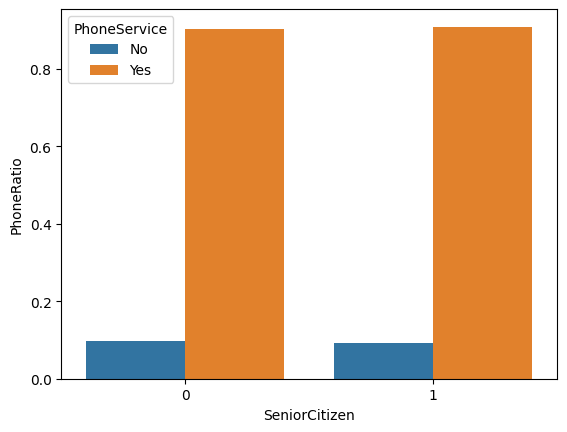

In [6]:
# your code goes here!
df3_telco= pd.DataFrame(df_telco_cust)
df3_telco_grup=df3_telco.groupby(['SeniorCitizen','PhoneService']).agg({'customerID':'count'}).reset_index()
df3_telco_grup['totalcust']=df3_telco_grup.groupby(['SeniorCitizen'])['customerID'].transform(sum)
df3_telco_grup['PhoneRatio']=df3_telco_grup['customerID']/df3_telco_grup['totalcust']
sns.barplot(data=df3_telco_grup, x='SeniorCitizen', y='PhoneRatio', hue='PhoneService'); # example only

Jadi, dari plot di atas, dapat disimpulkan bahwa kebanyakan senior citizen berlangganan Phone service.



$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

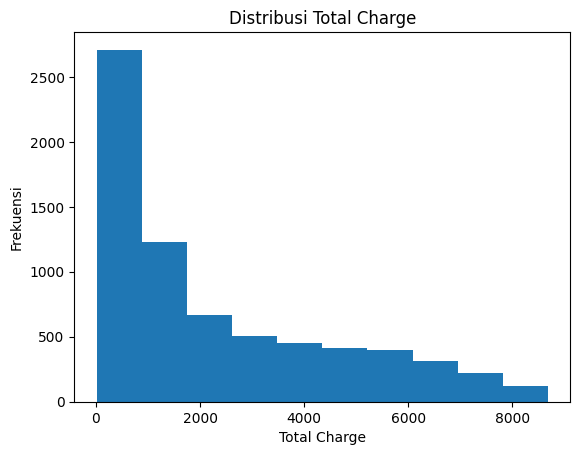

In [7]:
# your code goes here!
df_telco_cust['TotalCharges']=df_telco_cust['TotalCharges'].apply(pd.to_numeric,errors='coerce')
#Distribusi plot
plt.hist(df_telco_cust['TotalCharges'])
plt.xlabel('Total Charge')
plt.ylabel('Frekuensi')
plt.title('Distribusi Total Charge')
plt.show()
 # example only

Jadi, dari plot di atas, dapat disimpulkan bahwa distribusi dari total charge tidak berdistribusi normal yang artinya terdapat kemencengan (Skewness)

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

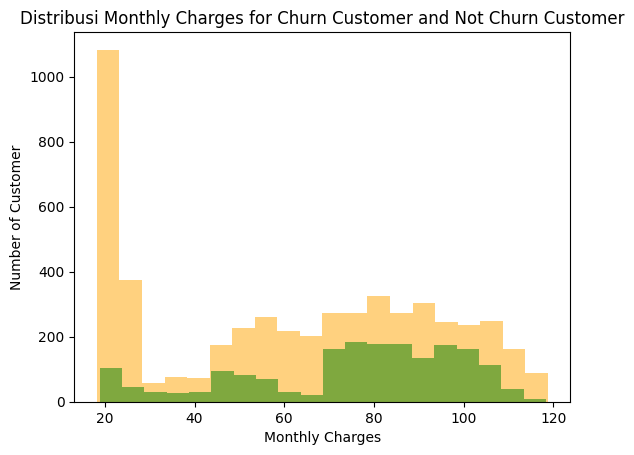

In [8]:
# your code goes here!
churn_customer= df_telco_cust[df_telco_cust['Churn']=='Yes']
no_churn= df_telco_cust[df_telco_cust['Churn']=='No']
plt.hist(no_churn['MonthlyCharges'], bins=20, alpha =0.5, label =' No Churn Customer', color='orange')
plt.hist(churn_customer['MonthlyCharges'],bins=20, alpha=0.5, label ='Churn Customer', color ='green')

plt.xlabel ('Monthly Charges')
plt.ylabel('Number of Customer')
plt.title('Distribusi Monthly Charges for Churn Customer and Not Churn Customer')
plt.show() # example only

Jadi, dari plot di atas, dapat disimpulkan bahwa Monthly charges yang tinggi tidak cenderung churn, malah kearah not churn.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

Text(0.5, 1.0, 'Tingkat Churn Customer with Patner & Dependen')

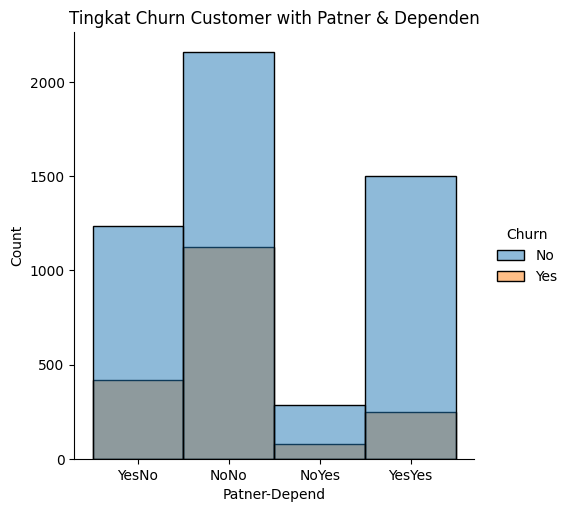

In [9]:
# your code goes here!
df6_telco= pd.DataFrame(df_telco_cust)
df6_telco['Patner-Depend']= pd.concat([df6_telco['Partner']+df6_telco['Dependents']])

sns.displot(data=df6_telco,x='Patner-Depend', hue='Churn' )
plt.title('Tingkat Churn Customer with Patner & Dependen')

Jadi, dari plot di atas, dapat disimpulkan bahwa Memiliki patner dan dependen berpengaruh terhadap tingkat churn, karena banyak jika tidak memiliki patner dan tidak dependen tingkat churnnya lebih tinggi dibanding yang lainnya.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

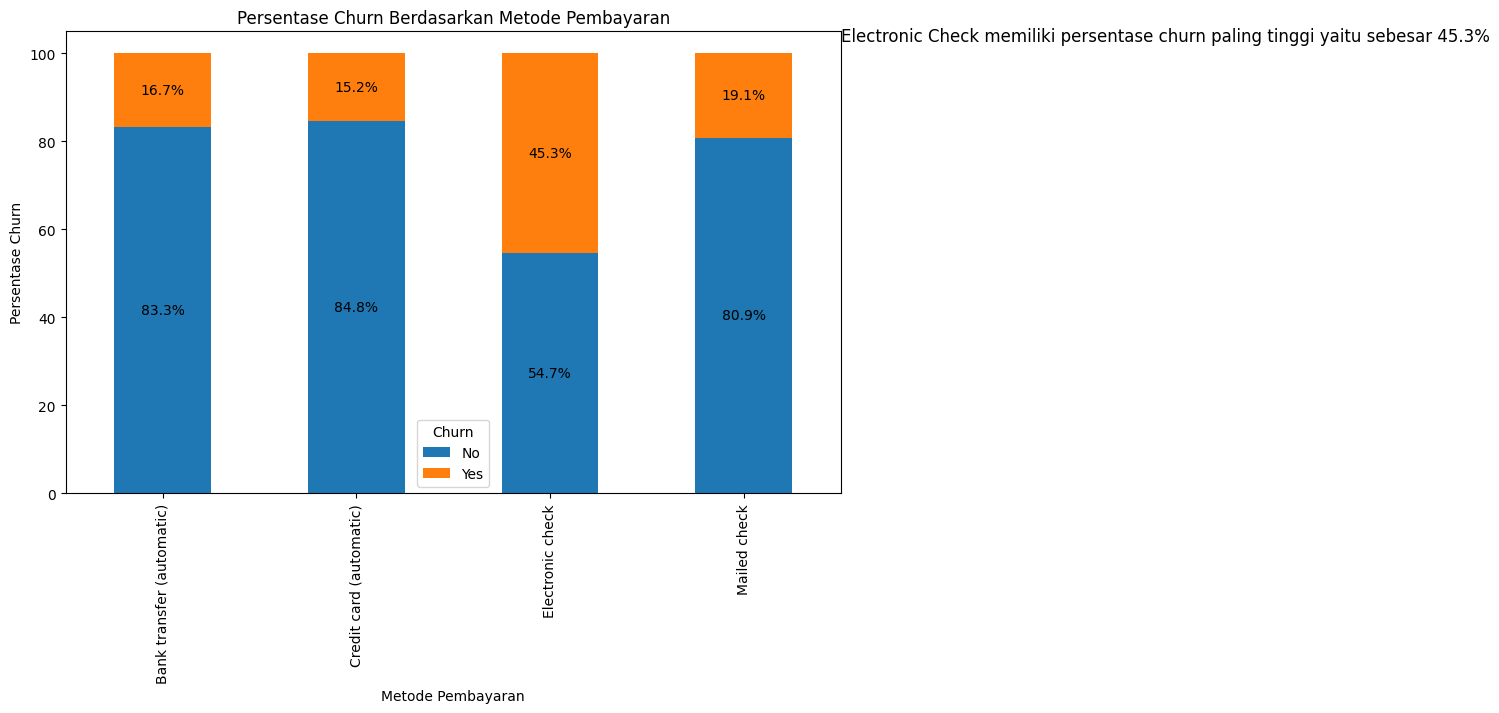

In [10]:
# your code goes here!
df7_telco =pd.DataFrame(df_telco_cust)
chur_count=df7_telco.groupby(['PaymentMethod', 'Churn']).size().unstack()
churn_percent=chur_count.apply(lambda x:x/ x.sum()*100, axis=1)
fig, ax = plt.subplots(figsize=(10, 6))
churn_percent.plot(kind='bar', stacked=True, ax=ax)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

# Menambahkan judul dan label pada sumbu-sumbu
plt.title('Persentase Churn Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Persentase Churn')
storyline= 'Electronic Check memiliki persentase churn paling tinggi yaitu sebesar 45.3%'
plt.annotate(storyline, xy=(1, 0.98
                            ),xycoords='axes fraction', fontsize=12, ha='left')
# Menampilkan visualisasi
plt.show()